In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates
from IPython.display import display
pd.set_option('mode.chained_assignment', None)

In [2]:
filename = "log.txt"
df = pd.read_csv(filename, sep="|", header=None)

In [3]:
df.columns = ["time", "level", "file", "location", "contents"]

In [4]:
r = df.time.apply(lambda x: ":".join(x.split(":")[:-1]) + "." + x.split(":")[-1])

In [5]:
df.time = pd.to_datetime(r, errors="coerce")

In [6]:
cleaned_df = df[df.time.notnull()]

In [7]:
memory_df = cleaned_df[cleaned_df.contents.str.contains("WorkingSetSize", na=False, regex=False)]

In [8]:
working_set_size_df = memory_df[~memory_df.contents.str.contains("Peak", regex=False, na=True)]
s = working_set_size_df.contents.apply(lambda x: x.split(" ")[-1])
working_set_size_df.contents = pd.to_numeric(s, errors="coerce")
working_set_size_df = working_set_size_df[working_set_size_df.contents.notnull()]

In [9]:
peak_working_set_size_df = memory_df[memory_df.contents.str.contains("Peak", regex=False, na=False)]
t = peak_working_set_size_df.contents.apply(lambda x: x.split(" ")[-1])
peak_working_set_size_df.contents = pd.to_numeric(t, errors="coerce")
peak_working_set_size_df = peak_working_set_size_df[peak_working_set_size_df.contents.notnull()]

In [10]:
working_set_size_df.sort_values(by=["time"], inplace=True)
peak_working_set_size_df.sort_values(by=["time"], inplace=True)

In [29]:
level_to_color = {
    "WARNING": (1., 0., 0., 0.4),
    "INFO": (0., 0.3, 1., 0.4)
}

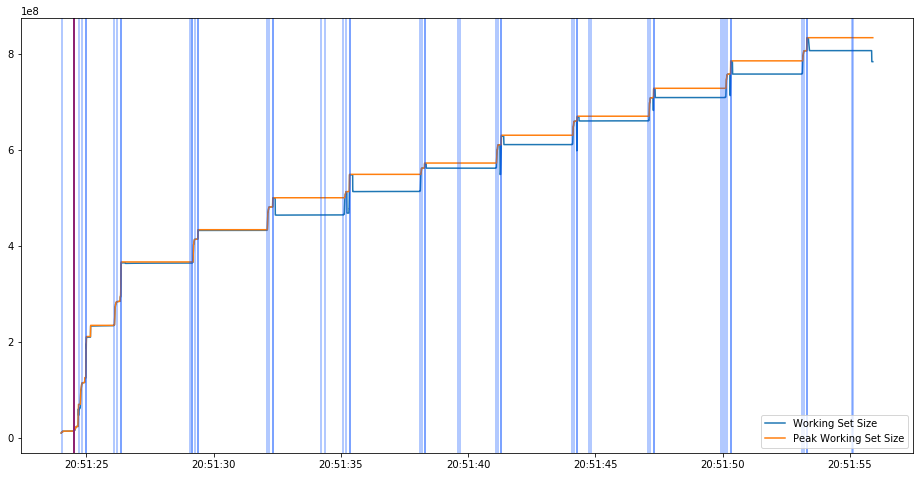

In [30]:
plt.figure(figsize=(16, 8))
plt.plot(working_set_size_df.time, working_set_size_df.contents, label="Working Set Size")
plt.plot(peak_working_set_size_df.time, peak_working_set_size_df.contents, label="Peak Working Set Size")
bb = cleaned_df.sort_values(by=["time"])
bb = bb[~bb.contents.str.contains("Working", regex=False, na=True)]
earliest_time = min(min(working_set_size_df.time), min(peak_working_set_size_df.time)) 
latest_time = max(max(working_set_size_df.time), max(peak_working_set_size_df.time))
for t, l in zip(bb.time, bb.level):
    if earliest_time <= t <= latest_time:
        plt.axvline(t, color=level_to_color[l.strip()])
plt.legend(loc='best')
plt.show()

In [34]:
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        return (start <= x) & (x <= end)
    else:
        return (start <= x) | (x <= end)

In [35]:
a = peak_working_set_size_df[peak_working_set_size_df.contents.diff() != 0]
windows = []
for j in range(1+(a.time.diff() >= datetime.timedelta(seconds=1)).cumsum().max()):
    windows.append(a[(a.time.diff() >= datetime.timedelta(seconds=1)).cumsum() == j])
for j in range(len(windows)):
    windows[j] = peak_working_set_size_df[time_in_range(windows[j].time.iloc[0] - datetime.timedelta(seconds=1),
                                          windows[j].time.iloc[-1] + datetime.timedelta(seconds=1),
                                          peak_working_set_size_df.time)]

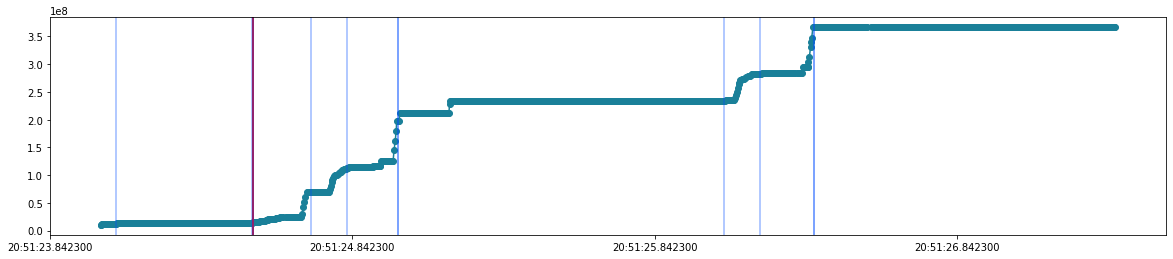

,time,level,file,location,contents
66,2020-05-08 20:51:24.061,INFO,wasapicapture.c,CreateAudioDevice:77,Minimum period: 30000
362,2020-05-08 20:51:24.511,INFO,dxgicapture.c,CreateCaptureDevice:19,Creating capture device for resolution 3200x1...
371,2020-05-08 20:51:24.513,INFO,dxgicapture.c,CreateCaptureDevice:125,Target Resolution: 3200x1800
374,2020-05-08 20:51:24.513,INFO,dxgicapture.c,CreateCaptureDevice:184,Device Name: \\.\DISPLAY1
372,2020-05-08 20:51:24.513,INFO,dxgicapture.c,CreateCaptureDevice:126,Number of display modes: 0
370,2020-05-08 20:51:24.513,WARNING,dxgicapture.c,CreateCaptureDevice:119,Could not GetDisplayModeList: 887A0022
373,2020-05-08 20:51:24.513,INFO,dxgicapture.c,CreateCaptureDevice:171,Found Resolution: 0x0
368,2020-05-08 20:51:24.513,INFO,dxgicapture.c,CreateCaptureDevice:77,Found monitor 0 on adapter 0
365,2020-05-08 20:51:24.513,WARNING,dxgicapture.c,CreateCaptureDevice:60,Adapter 0: NVIDIA Tesla M60
369,2020-05-08 20:51:24.513,WARNING,dxgicapture.c,CreateCaptureDevice:112,Could not GetDisplayModeList: 887A0022


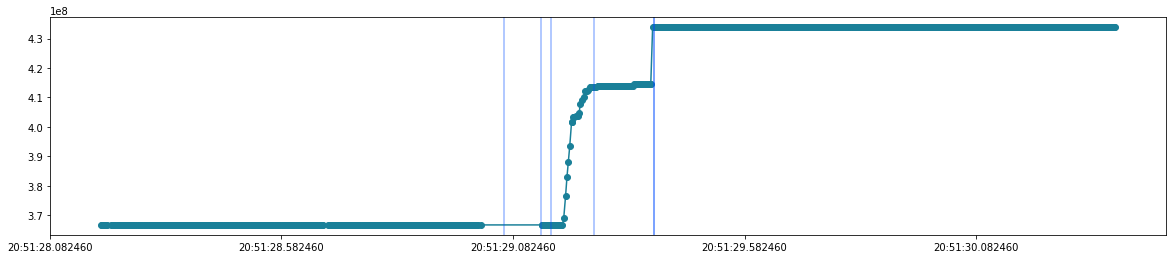

,time,level,file,location,contents
3404,2020-05-08 20:51:29.063,INFO,network.c,SendJSONPost:1295,Webserver Response: HTTP/1.1 200 OK
3407,2020-05-08 20:51:29.143,INFO,network.c,SendJSONPost:1295,Webserver Response: HTTP/1.1 200 OK
3426,2020-05-08 20:51:29.165,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
3486,2020-05-08 20:51:29.257,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.092522
3573,2020-05-08 20:51:29.386,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!
3572,2020-05-08 20:51:29.386,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!


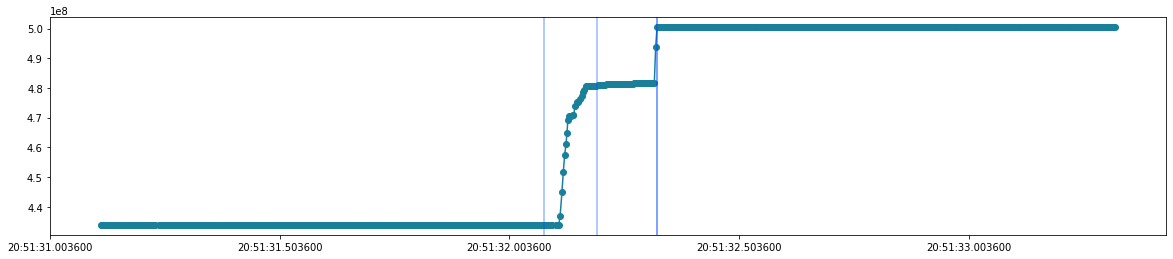

,time,level,file,location,contents
5439,2020-05-08 20:51:32.079,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
5512,2020-05-08 20:51:32.194,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.114558
5602,2020-05-08 20:51:32.325,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
5603,2020-05-08 20:51:32.325,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


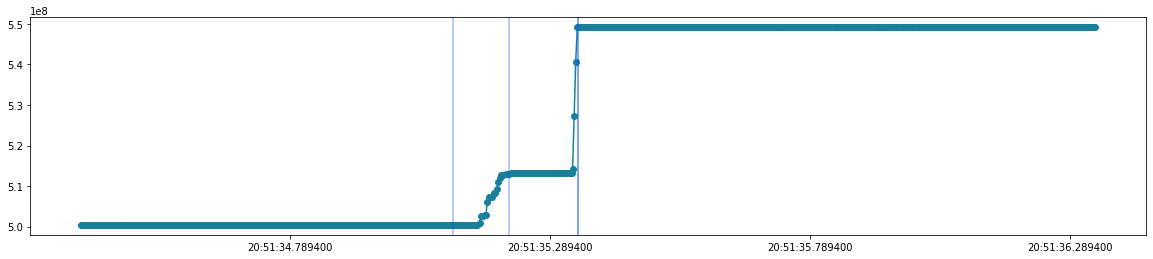

,time,level,file,location,contents
7355,2020-05-08 20:51:35.102,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
7426,2020-05-08 20:51:35.210,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.107677
7518,2020-05-08 20:51:35.343,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!
7517,2020-05-08 20:51:35.343,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!


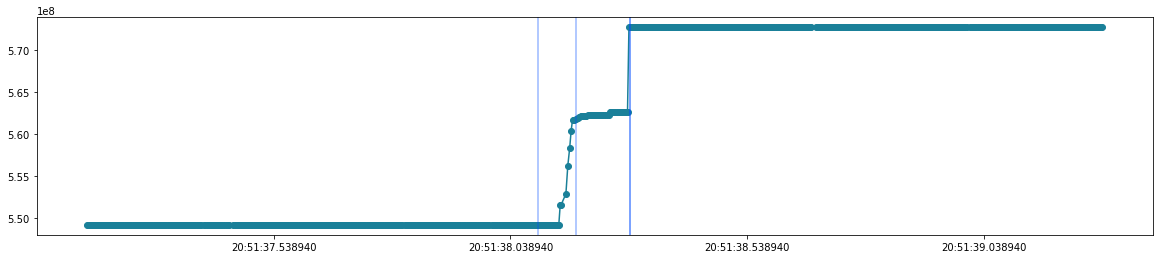

,time,level,file,location,contents
9402,2020-05-08 20:51:38.098,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
9454,2020-05-08 20:51:38.178,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.080381
9531,2020-05-08 20:51:38.291,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
9532,2020-05-08 20:51:38.291,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


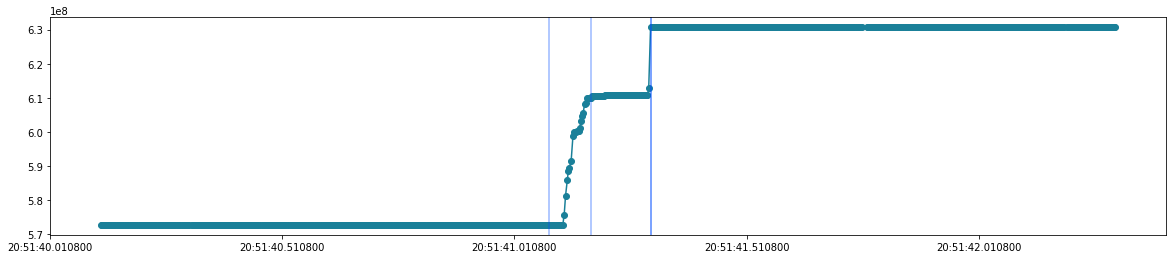

,time,level,file,location,contents
11257,2020-05-08 20:51:41.086,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
11318,2020-05-08 20:51:41.175,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.088661
11412,2020-05-08 20:51:41.306,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
11413,2020-05-08 20:51:41.306,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


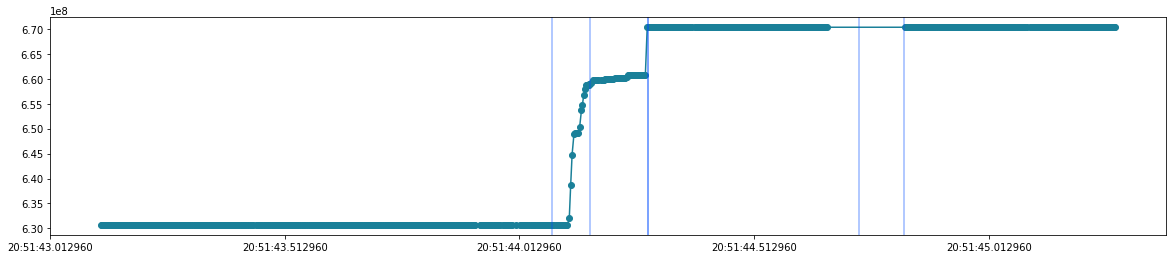

,time,level,file,location,contents
13331,2020-05-08 20:51:44.083,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
13389,2020-05-08 20:51:44.163,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.080254
13470,2020-05-08 20:51:44.287,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
13471,2020-05-08 20:51:44.287,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!
13739,2020-05-08 20:51:44.737,INFO,network.c,SendJSONPost:1295,Webserver Response: HTTP/1.1 200 OK
13740,2020-05-08 20:51:44.832,INFO,network.c,SendJSONPost:1295,Webserver Response: HTTP/1.1 200 OK


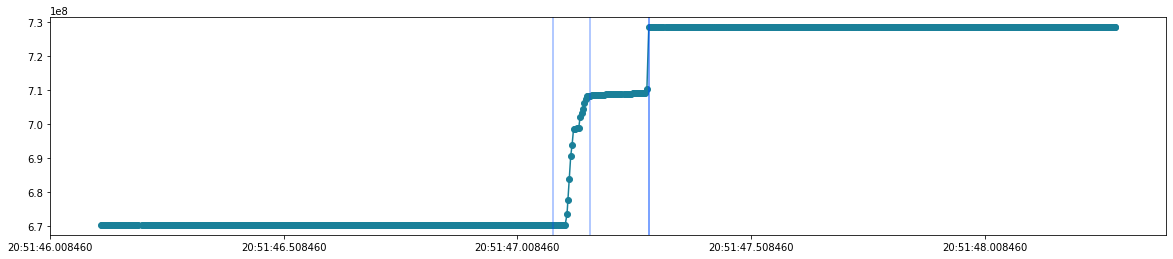

,time,level,file,location,contents
15315,2020-05-08 20:51:47.086,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
15369,2020-05-08 20:51:47.164,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.077157
15450,2020-05-08 20:51:47.291,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
15451,2020-05-08 20:51:47.291,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


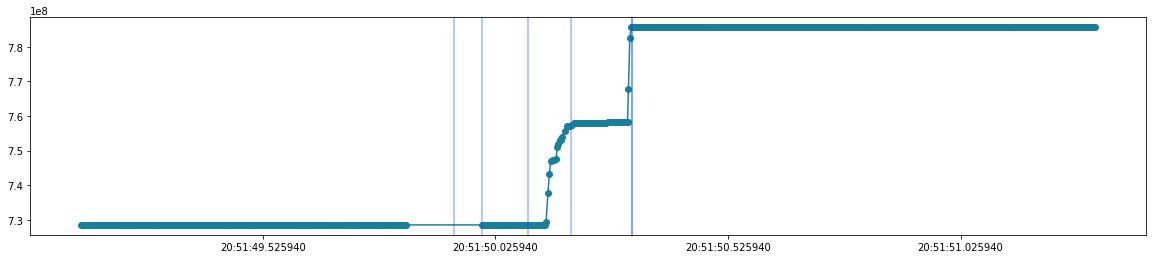

,time,level,file,location,contents
17210,2020-05-08 20:51:49.938,INFO,network.c,SendJSONPost:1295,Webserver Response: HTTP/1.1 200 OK
17212,2020-05-08 20:51:49.997,INFO,network.c,SendJSONPost:1295,Webserver Response: HTTP/1.1 200 OK
17285,2020-05-08 20:51:50.096,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
17348,2020-05-08 20:51:50.188,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.091937
17431,2020-05-08 20:51:50.319,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
17432,2020-05-08 20:51:50.319,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


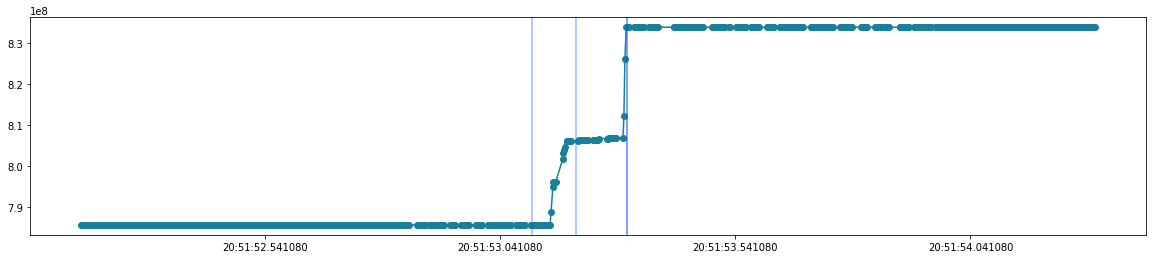

,time,level,file,location,contents
19310,2020-05-08 20:51:53.108,INFO,videoencode.c,try_setup_video_encoder:31,Trying Nvidia encoder
19371,2020-05-08 20:51:53.203,INFO,videoencode.c,try_setup_video_encoder:43,Time to create encoder: 0.094906
19432,2020-05-08 20:51:53.310,INFO,videoencode.c,try_setup_video_encoder:260,Video Encoder created!
19433,2020-05-08 20:51:53.310,INFO,videoencode.c,create_video_encoder:292,Video encoder: Success!


In [36]:
for window in windows:
    in_window = time_in_range(window.time.iloc[0], window.time.iloc[-1], cleaned_df.time)
    b = cleaned_df[in_window].sort_values(by=["time"])
    b = b[~b.contents.str.contains("Working", regex=False, na=True)]
    in_window = time_in_range(window.time.iloc[0], window.time.iloc[-1], peak_working_set_size_df.time)
    plt.figure(figsize=(20, 4))
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M:%S.%f"))
    plt.plot(peak_working_set_size_df[in_window].time, peak_working_set_size_df[in_window].contents, 'o-', color=(0.1, 0.5, 0.6))
    for t, l in zip(b.time, b.level):
        plt.axvline(t, color=level_to_color[l.strip()])
    plt.show()
    display(b)